# AGB outflow chemical model tutorial

In this tutorial, you can play around with some AGB chemical model outputs. The output is stored in the `output/` folder. 

You can vary over chemistry type (carbon-rich, oxygen-rich), three different mass-loss rates (1e-5, 1e-6, 1e-7 solar masses/year - this corresponds to different densities of the outflow), and you can turn the presence of a closeby solar-like companion on and off. This gives you 12 models in total to explore!

Structure: read in output, plotting scripts, your space

## Read in model output

Read in python libraries

In [51]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

Read in the model output. `radius` is a list containing all the radii within the outflow at which the chemistry has been calculated for all models. `fracs` is a python dictionary that contains all the fractional abundances of the 12 models. 

Fractional abundance = the abundance of the molecules with respect to H2. H2 is the most abundant molecule in the outflow (and the Universe in general). By plotting fractional abundances rather than absolute abundances, we filter out the effect of the outflow itself. I.e., flat line in fractional abundance doesn't mean that the abundance is constant, but that it is constant with respect to H2 and still decreases as  distance^2.

In [16]:
with open('allfracs.pkl', 'rb') as f:
    allfracs = pickle.load(f)
with open('radius.pkl', 'rb') as f:
    radius = pickle.load(f)


## Plotting 

Now, we'll move on to plotting the chemical model output. There are many things you can plot against each other: how different molecules behave in a single model, how a molecule behaves when you vary models... 

Below, I explain the code to plot 1) different molecules in one model, 2) the same molecule in different models, and 3) different molecules in different models.

You can run the code and experience how it works, play around with changing molecules and models.

### Different molecules in one model

Select mass-loss rate (`mdot = 1e-5`, `1e-6` or `1e-7`), type of chemistry (`chemistry = Orich` or `Crich`), and if you want a closeby solar-like companion (`companion = off` or `on`).

In [49]:
mdot = '1e-5'
chemistry = 'Crich'
companion = 'off'

Read in the fractional abundances

In [50]:
fracs = allfracs[mdot+'_'+chemistry+'_'+companion]

Select the molecules you want to plot

In [53]:
molecules = ['H2O','SiO','OH']

Select the range of the plot's y-axis. Fractional abundances smaller than 1e-25 wrt H2 are meaningless from a computational point of view (the code considers numbers smaller than 1e-25 to be zero), smaller than some 1e-10 wrt H2 is meaningless from an observational point of view (abundances too small to be observable). 

`oom` gives the orders of magnitudes you want to plot.

In [54]:
oom = 1e6


Select the colors. Here, you're selecting the same number of colors as molecules the Seaborn colorblind palette. Have a look at the documentation to change colors! 

In [55]:
colors = sns.color_palette('colorblind', len(molecules))

Text(0, 0.5, 'Fractional abundance')

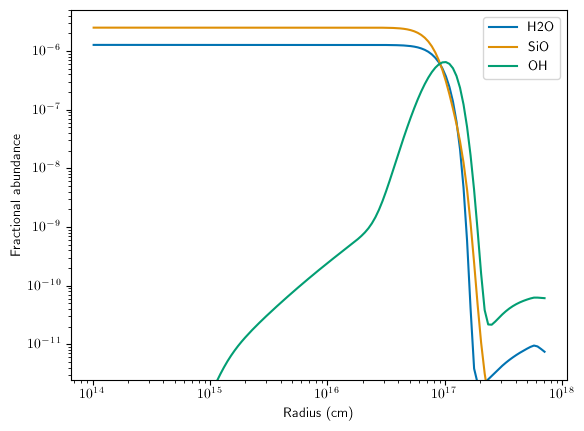

In [58]:
maxs = []
for imol, mol in enumerate(molecules):
    plt.loglog(radius,fracs[mol],c=colors[imol],label=mol)
    maxs.append(max(fracs[mol]))
plt.ylim(max(maxs)/oom,max(maxs)*2)
plt.legend()
plt.xlabel('Radius (cm)')
plt.ylabel('Fractional abundance')

### A molecules in different models

Compare different mass-loss rates, types of chemistry, and solar-like companion present or absent. Rather than giving one value, we now give lists.

In [62]:
mdots = ['1e-5','1e-7']
chemistries = ['Crich']
companions = ['off']

Loop through the different options. Store the names of the models in a list. If you want to switch up the order in which you loop over the models, you can change the order of the for loops.

In [79]:
names = []
for mdot in mdots:
    for chemistry in chemistries:
        for companion in companions:
            name = mdot+'_'+chemistry+'_'+companion 
            names.append(name)


In [80]:
mol = 'C2H'

In [81]:
colors = sns.color_palette('colorblind', len(names))

Text(0, 0.5, 'Fractional abundance')

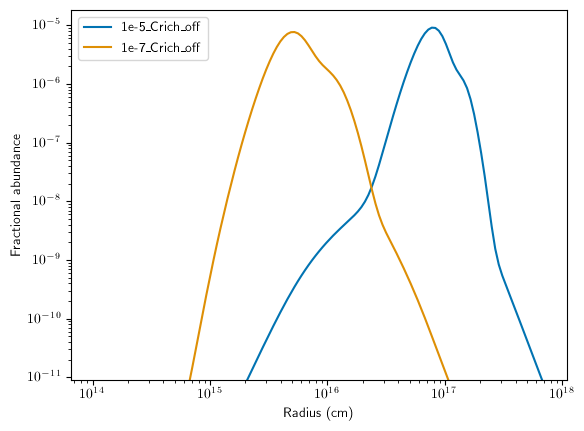

In [82]:
maxs = []
for iname, name in enumerate(names):
    plt.loglog(radius,allfracs[name][mol],c=colors[iname],label=name)
    maxs.append(max(allfracs[name][mol]))
plt.ylim(max(maxs)/oom,max(maxs)*2)
plt.legend()
plt.xlabel('Radius (cm)')
plt.ylabel('Fractional abundance')

### Different molecules in different models

In [92]:
mdots = ['1e-5','1e-7']
chemistries = ['Crich']
companions = ['off','on']

In [93]:
names = []
for mdot in mdots:
    for chemistry in chemistries:
        for companion in companions:
            name = mdot+'_'+chemistry+'_'+companion 
            names.append(name)


In [94]:
molecules = ['C2H2','C2H']

We're now giving different molecules the same color, different models have different linestyles. I've listed 12 linestyle because there are 12 models, but note that there are only 5 unique linestyles! 

In [95]:
colors = sns.color_palette('colorblind', len(molecules))
linestyles = ['-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.',]

Text(0, 0.5, 'Fractional abundance')

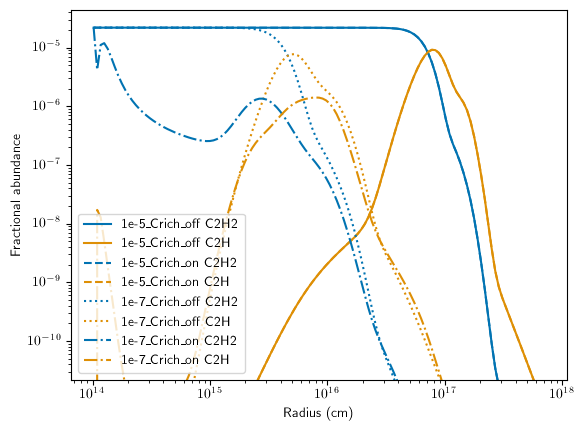

In [96]:
maxs = []
for iname, name in enumerate(names):
    for imol, mol in enumerate(molecules):
        plt.loglog(radius,allfracs[name][mol],c=colors[imol],ls=linestyles[iname],label=name+' '+mol)
        maxs.append(max(allfracs[name][mol]))
plt.ylim(max(maxs)/oom,max(maxs)*2)
plt.legend()
plt.xlabel('Radius (cm)')
plt.ylabel('Fractional abundance')

## Your plotting space

Time to discover the chemistry within different AGB outflows and compare them! You can play with the scripts above, or copy some of the code here to have a dedicated space. 

Some questions for you to consider:

1) Compare the behaviour of different molecules in C-rich and O-rich outflows. For example, how does H2O behave? What about C2H2, CN, OH, SiC2?

2) For one type of chemistry, how do the abundances change with mass-loss rate? Compare the sizes of the envelopes of parent species like CO, SiO, HCN. Compare how daughter species change as well, how does the location of their peak abundance change?

3. When including a close-by star like our Sun, you include a strong UV field in the dense inner wind. This can significantly impact the chemistry! Which molecules are affected most? Do you see a difference between high and low mass-loss rates?